This notebook implements KMeans and Principle Component Analysis algorithms.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
cols = ["area", "perimeter", "compactness", "length", "width", "asymmetry", "groove", "class"]

data = pd.read_csv('seeds.csv', names=cols)

# If it is a .txt file that you wish to read as a csv, you can do this

# data = pd.read_csv('seeds.txt', names=cols, sep="\s+")

data.head()

,area,perimeter,compactness,length,width,asymmetry,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


Creating plots of each feature against the others to see which two can be used to perform clustering on

In [9]:
# for i in range(len(cols)-1):
#     for j in range(i+1, len(cols)-1):
#         x_label = cols[i]
#         y_label = cols[j]
#         sns.scatterplot(x=x_label, y=y_label, data=data, hue='class')
#         plt.show()

Clustering: K-Means Clustering

In [10]:
from sklearn.cluster import KMeans

In here, X and Y are two features only, on which clustering will be performed. These are not the feature and the target.

In [26]:
x = "compactness"
y = "asymmetry"

X = data[[x, y]].values

In [27]:
kmeans = KMeans(n_clusters=3).fit(X)

C:\Users\malha\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [28]:
clusters = kmeans.labels_

In [29]:
clusters

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 2, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 1, 2, 2, 2, 1, 1, 1, 1, 0,
       2, 2, 1, 0, 0, 2, 2, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 1, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 2, 2, 2, 0, 2, 1, 0, 0, 2, 2, 2, 0, 0,
       0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0,
       2, 0, 2, 1, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0,
       0, 1, 2, 1, 0, 2, 0, 0, 0, 2, 0, 2])

In [30]:
data["class"].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)

In [31]:
# The exercise performed above gives an idea about how the clustering is done. The values may be different, but if 1 is at a particular place, 0 will also be in that same place and likewise. So, a mapping of some sort is being performed

In [32]:
cluster_data = pd.DataFrame(np.hstack((X, clusters.reshape(-1, 1))), columns=[x, y, "class"])

[]

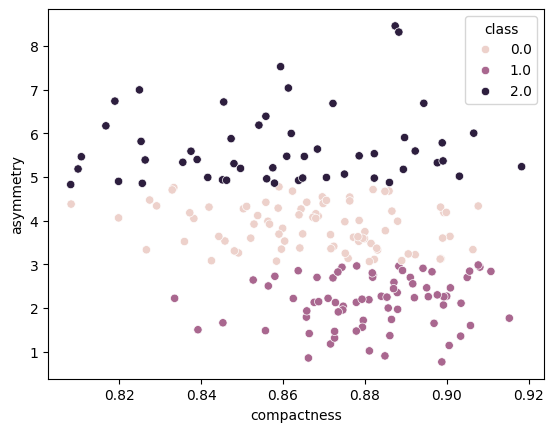

In [33]:
# Plotting K-Means classes

sns.scatterplot(x=x, y=y, hue='class', data=cluster_data)
plt.plot()

[]

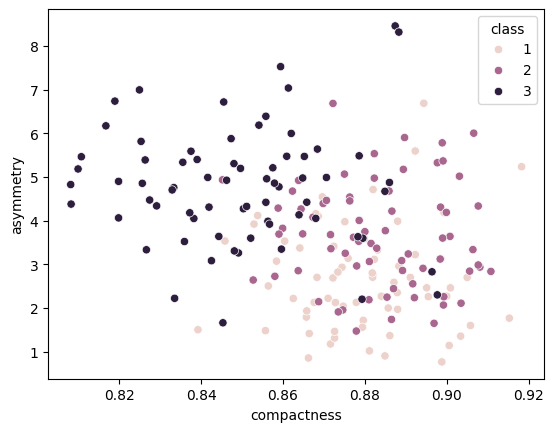

In [34]:
# Plotting original classes

sns.scatterplot(x=x, y=y, hue='class', data=data)
plt.plot()

Higher Dimensions

In [35]:
X = data[cols[:-1]].values

In [36]:
kmeans_higher = KMeans(n_clusters=3).fit(X)
cluster_data_higher = pd.DataFrame(np.hstack((X, clusters.reshape(-1, 1))), columns=data.columns)

C:\Users\malha\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[]

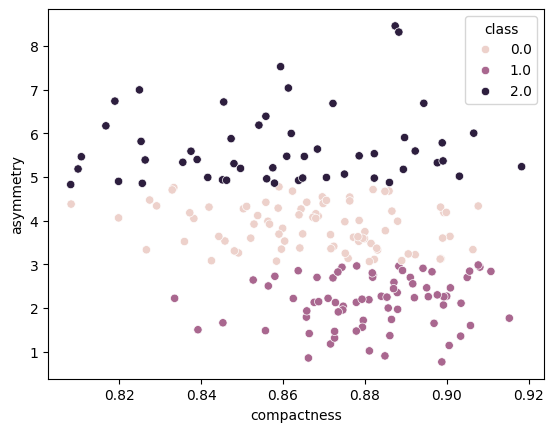

In [37]:
# Plotting K-Means higher dimensions classes

sns.scatterplot(x=x, y=y, hue='class', data=cluster_data_higher)
plt.plot()

[]

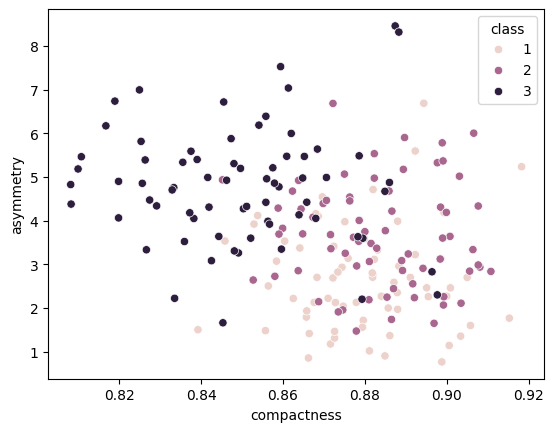

In [38]:
# Plotting original classes

sns.scatterplot(x=x, y=y, hue='class', data=data)
plt.plot()

Principle Component Analysis

In [39]:
from sklearn.decomposition import PCA

In [40]:
pca = PCA(n_components=2)
transformed_x = pca.fit_transform(X)

In [41]:
X.shape

(210, 7)

In [42]:
transformed_x.shape

(210, 2)

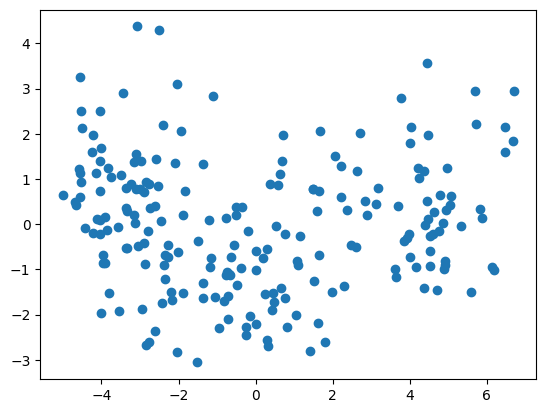

In [44]:
plt.scatter(transformed_x[:,0], transformed_x[:,1])
plt.show()

In [45]:
kmeans_pca_data = pd.DataFrfame(np.hstack((transformed_x, kmeans.labels_.reshape(-1, 1))), columns=["pca1", "pca2", "class"])

In [47]:
truth_pca_data = pd.DataFrame(np.hstack((transformed_x, data["class"].values.reshape(-1, 1))), columns=["pca1", "pca2", "class"])

[]

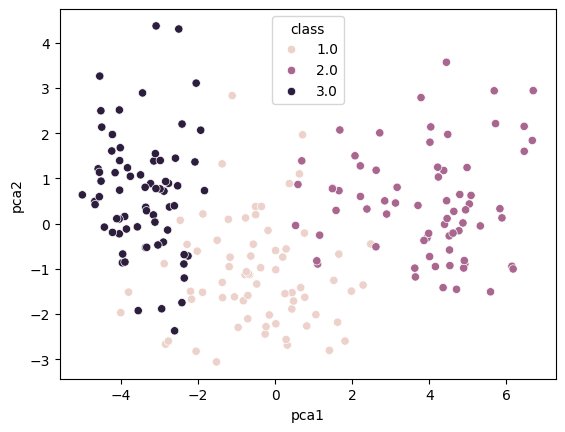

In [50]:
sns.scatterplot(x='pca1', y='pca2', hue='class', data=truth_pca_data)
plt.plot()